<a href="https://www.kaggle.com/code/kuralamuthan300/bankruptcy-prediction-twse?scriptVersionId=162916634" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Company Bankruptcy

Company bankruptcy occurs when a company cannot pay its debts and obligations to creditors, resulting in the company's assets being liquidated to repay those debts. This can lead to the company ceasing operations and potentially going out of business.

<center><img src="https://s3.amazonaws.com/journalism.industrydive.com/special-projects/retail/2021-bankruptcy-tracker/header.png" width="600" height="600"/></center>

# Why Study Past Bankruptcies ? 

* **Risk Awareness**: Studying bankrupt companies enhances risk awareness, allowing investors to identify and mitigate potential financial pitfalls in their investment portfolios.

* **Industry Insight**: Analysis of bankruptcies provides valuable industry insights, helping businesses and analysts understand market trends, challenges, and dynamics.

* **Learning Opportunitie**s: Examining failed companies offers learning opportunities, enabling individuals and organizations to derive lessons, improve decision-making, and avoid repeating past mistakes.

* **Regulatory Guidance**: Insights from bankruptcies contribute to the development of effective regulations, guiding policymakers in creating frameworks that prevent systemic issues and protect stakeholders.

* **Strategic Guidance**: For struggling companies, studying bankruptcies provides strategic guidance, offering proven turnaround strategies to navigate financial challenges and work towards successful recovery.

***

<center> <code style="background:red;color:white"> Before delving into data analysis and ML model creation, a data scientist must grasp the organizational context and the landscape of the data under study </code> </center>


# About dataset

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange (TWSE).

Data collected includes company's bankrupted due to the effects of Dotcom Bubble (late 1990s and early 2000s) and Global Financial crisis (2007 - 2008).

**DotCom Bubble :**

In Taiwan, technology stocks were at the forefront of Dotcom bubble. Companies related to semiconductors, software, and internet services saw their valuations skyrocket. However, the bubble eventually burst, leading to a sharp decline in stock prices. Many investors suffered substantial losses as the market corrected itself.

**Global Financial crisis :**

Taiwan recovered quickly from the global financial crisis of 2007–2010, and its economy has been growing steadily since. Its economy faced a downturn in 2009 due to a heavy reliance on exports which in turn made it vulnerable to world markets. Unemployment reached levels not seen since 2003, and the economy fell 8.36% in the fourth quarter of 2008.

Dataset URL : https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction
Sourcr URL : https://en.wikipedia.org/wiki/Economy_of_Taiwan#2007%E2%80%932010_global_financial_crisis

## About source

Founded in April 1990, Taiwan Economic Journal (TEJ) specializes in providing all required and value-added information for fundamental analysis of the securities financial market. TEJ's primary business are selling domestic and international data on securities, finance, industries, and macroeconomics. Additionally, they provide consulting services in economic analysis, model design, and database construction.
   
<center><img src="https://i.ytimg.com/vi/LWDTMzdRHao/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLCL2BZOFidWb1-n2tZYji3DgnNOfA" width="600" height="600"/></center>

Source URL : https://www.tejwin.com/en/

***

## About Taiwan 

* The economy of Taiwan is a **highly developed free-market economy**. 

* **8th largest in Asia and 20th-largest in the world** by purchasing power parity, allowing Taiwan to be included in the advanced economies group by the International Monetary Fund. 

* Notable for its rapid economic development from an **agriculture-based society to an industrialised**, high-income country. 

* One of the most technologically advanced computer microchip and high-tech electronics industries makers in the world.

* Home to many companies responsible for notable contributions, such as TSMC, Foxconn, ASUS, PEGATRON, etc.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/GDP_per_capita_development_in_Taiwan.svg/1280px-GDP_per_capita_development_in_Taiwan.svg.png" width="600" height="600"/></center>

# Lets dive into the data 📖

In [111]:
# Library installation goes here
! pip install ppscore pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190272 sha256=9fc22671d00592f5f7211620ec654695865acd03e3f23cbef9df3e6fd3d9f5a0
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [118]:
# Importing Libraries

## Data manipulation
import numpy as np
import pandas as pd

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Sklearn functions
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier

## Imblearn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, KMeansSMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

## Predictive power score
import ppscore as pps

## Scipy functions
from scipy.stats import randint

## XGBoost models
from xgboost import XGBClassifier

In [4]:
# Defining functions

## Apply scaler
def input_scaler_func(X_var):
    
    # Using scaler
    scaler = RobustScaler()
    scaler.fit(X_var)
    X_var_tran = scaler.transform(X_var)
    return X_var_tran

## Oversampler
def oversample_data(sampler,X,y):
    return(sampler.fit_resample(X, y))

# Calculation of performance metrics
def perf_metrics(y_true, y_pred_binary):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary,average='binary')
    recall = recall_score(y_true, y_pred_binary,average='binary')
    f1 = f1_score(y_true, y_pred_binary,average='binary')

    # Create dictionary to store metrics
    metrics_dict = {
        'accuracy': round(accuracy*100,2),
        'balanced_accuracy' : round(balanced_accuracy*100,2),
        'precision': round(precision*100,2),
        'recall': round(recall*100,2),
        'f1_score': round(f1*100,2)
    }

    return metrics_dict

In [5]:
company_df = pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")
company_df = company_df.rename(columns=lambda x: x.strip())

In [6]:
company_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [7]:
# Renaming Bankrupt column
company_df.rename(columns={'Bankrupt?': 'Bankrupt'},inplace = True)

In [8]:
# Dimension
print("\nData dimension :")
print("Number of Records : ",company_df.shape[0],"\nNumber of Features : ",company_df.shape[1])

# Datatype of columns
print("\nDatatype of Features :")
print(company_df.dtypes.value_counts())

# Missing values
print("\nMissing values :")
na_value_check = company_df.isna().sum()
if len(na_value_check[na_value_check > 0]) == 0 :
    print("Missing values not identified")
else :
    print(na_value_check[na_value_check > 0])

# Duplicated records check
print("\nDuplicated records :")
duplicate_rows = company_df.duplicated()
if len(company_df[duplicate_rows]) == 0:
    print("Duplicated records not identified")
else :
    print("Number of duplicated records :",len(company_df[duplicate_rows]))


Data dimension :
Number of Records :  6819 
Number of Features :  96

Datatype of Features :
float64    93
int64       3
dtype: int64

Missing values :
Missing values not identified

Duplicated records :
Duplicated records not identified


> **Observations :**
> 
> * All the given features are numeric *(int64 or float64)*
> * Column *Net Income Flag* and *Liability-Assets Flag* looks like a catogorical columns (These features have "Flag" in its name)
>     * Bankrupt column is also an integer column
> * There is no missing values

## Correlation study 🎢

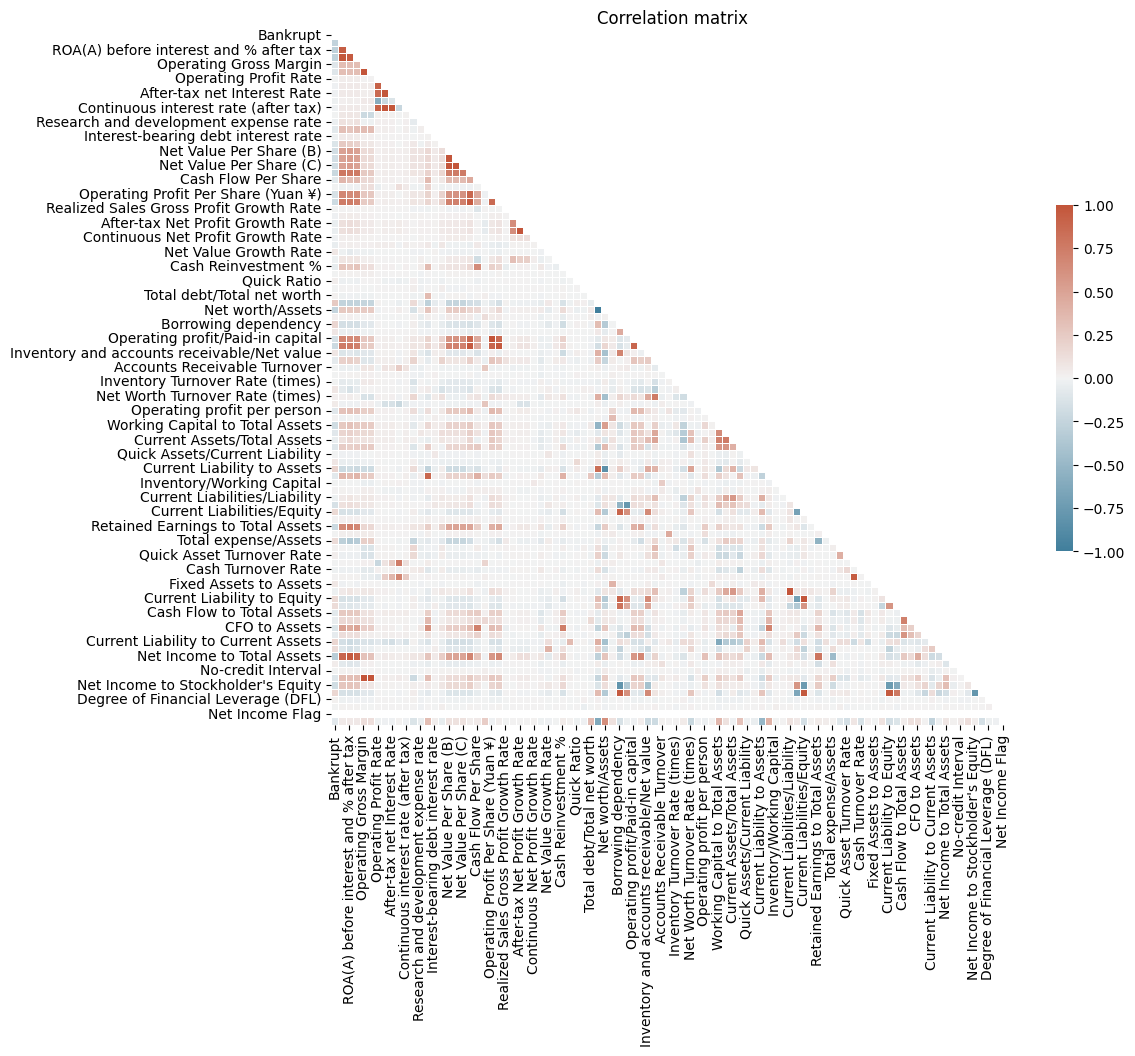

In [9]:
# Correlation

# Compute the correlation matrix
corr = company_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation matrix")
plt.show()

> **Observations :** So many features in the data are very strongly correlated as they were derived from linear formulas. For example : features with "pershare" in the name

## Curse of dimensionality

<div> <center>
    <img src="https://images.techhive.com/images/article/2015/01/social_network_analysis_visualization-100565998-orig.jpg?auto=webp&quality=85,70" width="500"/>
</center></div>

In the bankruptcy data we have has 90+ features. Analysing and building models using 90+ features is a time and resource consuming process.

*The curse of dimensionality is like trying to find a single sock in a mountain of laundry. As the number of dimensions (socks) increases, the chances of finding a match (meaningful patterns) become increasingly elusive and your search turns into a chaotic mess*

Lets narrow down our analysis to limited columns, so we will use **Decision tree algorithm**.


In [22]:
# Train and Test split
X = company_df.drop(['Bankrupt'],axis=1)
y = company_df.Bankrupt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

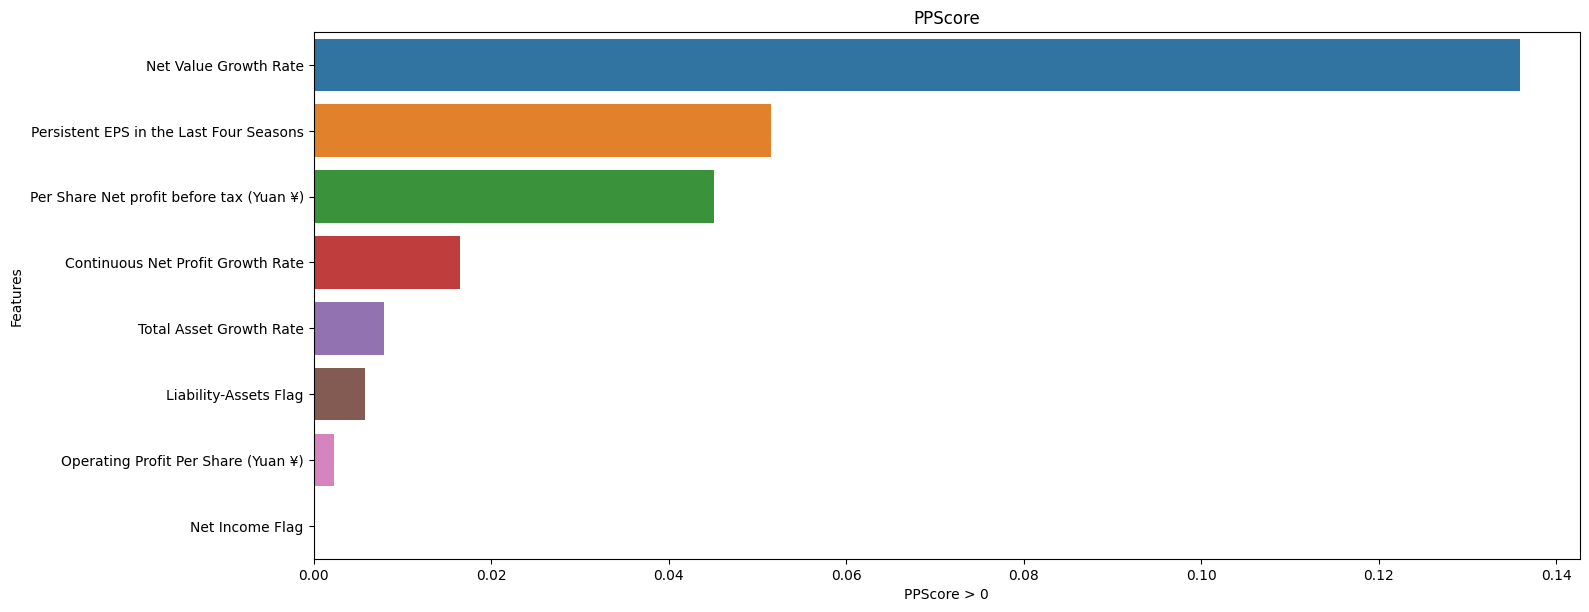

In [23]:
# Calculating Predictive power score (PPS)
pps_input_df = X_train.copy()
pps_input_df['Bankrupt'] = y_train.astype(str).copy()
pps_df = pps.predictors(pps_input_df, y="Bankrupt")
pps_df = pps_df[pps_df.ppscore > 0]

# Plotting PPS
plt.figure(figsize=(16,6))
sns.barplot(data=pps_df, x="ppscore", y="x")
plt.ylabel("Features")
plt.xlabel("PPScore > 0")
plt.tight_layout()
plt.title("PPScore")
plt.show()

In [24]:
pps_df.sort_values(by=['ppscore'], ascending=False)[:10]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Net Value Growth Rate,Bankrupt,1.358653e-01,classification,True,weighted F1,0.952557,0.959003,DecisionTreeClassifier()
1,Persistent EPS in the Last Four Seasons,Bankrupt,5.152728e-02,classification,True,weighted F1,0.952557,0.955002,DecisionTreeClassifier()
2,Per Share Net profit before tax (Yuan ¥),Bankrupt,4.507944e-02,classification,True,weighted F1,0.952557,0.954696,DecisionTreeClassifier()
3,Continuous Net Profit Growth Rate,Bankrupt,1.645076e-02,classification,True,weighted F1,0.952557,0.953337,DecisionTreeClassifier()
4,Total Asset Growth Rate,Bankrupt,7.930761e-03,classification,True,weighted F1,0.952557,0.952933,DecisionTreeClassifier()
5,Liability-Assets Flag,Bankrupt,5.846652e-03,classification,True,weighted F1,0.952557,0.952834,DecisionTreeClassifier()
6,Operating Profit Per Share (Yuan ¥),Bankrupt,2.257157e-03,classification,True,weighted F1,0.952557,0.952664,DecisionTreeClassifier()
7,Net Income Flag,Bankrupt,6.633492e-07,classification,True,weighted F1,0.952557,0.952557,DecisionTreeClassifier()


In [36]:
selected_features_final = pps_df.x.tolist()

In [26]:
# Get top n features
## Lets select top n features based on feature importance
top_n_req = 15

In [27]:
# Define hyperparameters and their possible values for random search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 30,35 ,40],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Use RandomizedSearchCV for hyperparameter tuning with 5-fold cross-validation for decision tree classifier with F1 score
random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_distributions=param_dist, random_state=42, scoring = 'f1')
random_search.fit(X_train, y_train)

# Pring best params
print("Best parameters based on Random search :")
print(random_search.best_params_)

# Pring best score from CV
print("\nBest parameters based on Random search :")
print("F1 Score : ",round(random_search.best_score_,2))

Best parameters based on Random search :
{'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 25, 'criterion': 'entropy'}

Best parameters based on Random search :
F1 Score :  0.32


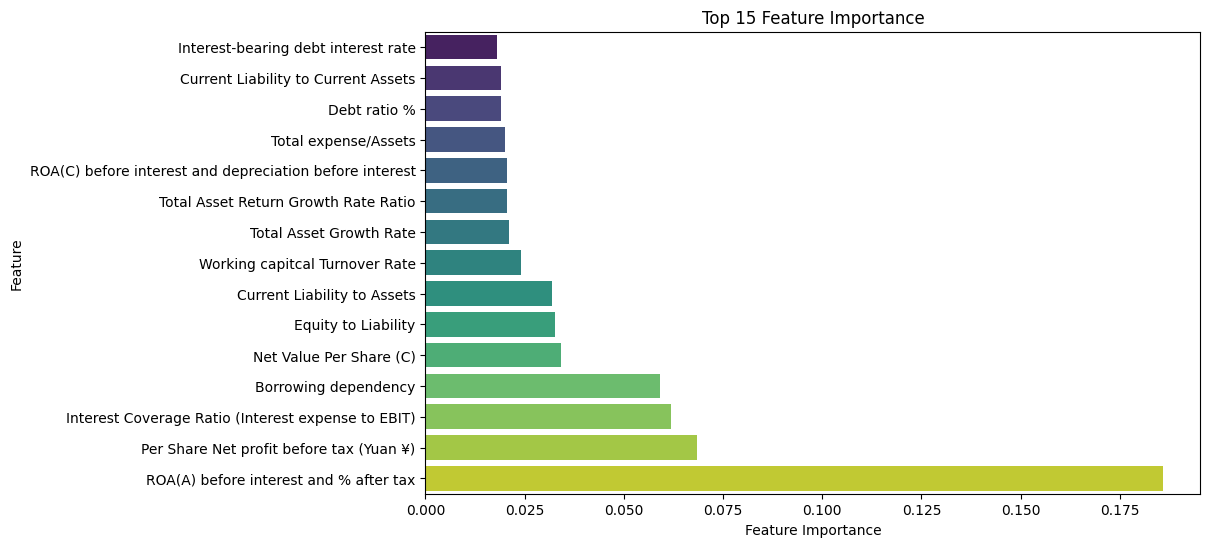

In [28]:
# Get best decision tree model
best_dt_classifier = random_search.best_estimator_

# Extract feature importances from the trained decision tree classifier
feature_importances = best_dt_classifier.feature_importances_
feature_names = best_dt_classifier.feature_names_in_

# Get the indices of the top n features
top_n_indices = np.argsort(feature_importances)[-top_n_req:]

# Create a DataFrame for easier plotting with seaborn
feature_importance_df = pd.DataFrame({'Feature': [feature_names[i] for i in top_n_indices],
                                      'Importance': feature_importances[top_n_indices]})

# Plot the top 10 features using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel("Feature Importance")
plt.title("Top "+str(top_n_req)+" Feature Importance")
plt.show()

In [37]:
# Selecting above features for EDA and model building
selected_features_final = list(set(selected_features_final + feature_importance_df.Feature.to_list()))

Selected features :
['Total Asset Return Growth Rate Ratio', 'Continuous Net Profit Growth Rate', 'Debt ratio %', 'Operating Profit Per Share (Yuan ¥)', 'ROA(C) before interest and depreciation before interest', 'Interest-bearing debt interest rate', 'Interest Coverage Ratio (Interest expense to EBIT)', 'Net Value Growth Rate', 'Total expense/Assets', 'Persistent EPS in the Last Four Seasons', 'Per Share Net profit before tax (Yuan ¥)', 'Net Value Per Share (C)', 'Current Liability to Current Assets', 'Current Liability to Assets', 'Total Asset Growth Rate', 'Working capitcal Turnover Rate', 'Liability-Assets Flag', 'Net Income Flag', 'Borrowing dependency', 'Equity to Liability', 'ROA(A) before interest and % after tax']


In [49]:
print("Selected features :")
print(selected_features_final)
print("\nNumber of features selected :")
print(len((selected_features_final)))

Selected features :
['Total Asset Return Growth Rate Ratio', 'Continuous Net Profit Growth Rate', 'Debt ratio %', 'Operating Profit Per Share (Yuan ¥)', 'ROA(C) before interest and depreciation before interest', 'Interest-bearing debt interest rate', 'Interest Coverage Ratio (Interest expense to EBIT)', 'Net Value Growth Rate', 'Total expense/Assets', 'Persistent EPS in the Last Four Seasons', 'Per Share Net profit before tax (Yuan ¥)', 'Net Value Per Share (C)', 'Current Liability to Current Assets', 'Current Liability to Assets', 'Total Asset Growth Rate', 'Working capitcal Turnover Rate', 'Liability-Assets Flag', 'Net Income Flag', 'Borrowing dependency', 'Equity to Liability', 'ROA(A) before interest and % after tax']

Number of features selected :
21


In [38]:
# Removing Train and Test variables
del(X_train, X_test, y_train, y_test)

# Data analysis - I 🪄

Before creating plots and making conclusions on the data, lets understand the shortlisted features first.

## Descriptive statistics

In [39]:
company_df[selected_features_final].describe()

,Total Asset Return Growth Rate Ratio,Continuous Net Profit Growth Rate,Debt ratio %,Operating Profit Per Share (Yuan ¥),ROA(C) before interest and depreciation before interest,Interest-bearing debt interest rate,Interest Coverage Ratio (Interest expense to EBIT),Net Value Growth Rate,Total expense/Assets,Persistent EPS in the Last Four Seasons,...,Net Value Per Share (C),Current Liability to Current Assets,Current Liability to Assets,Total Asset Growth Rate,Working capitcal Turnover Rate,Liability-Assets Flag,Net Income Flag,Borrowing dependency,Equity to Liability,ROA(A) before interest and % after tax
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.0,6819.000000,6819.000000,6819.000000
mean,0.264248,0.217639,0.113177,0.109091,0.505180,1.644801e+07,0.565358,1.566212e+06,0.029184,0.228813,...,0.190672,0.031506,0.090673,5.508097e+09,0.594006,0.001173,1.0,0.374654,0.047578,0.558625
std,0.009634,0.010063,0.053920,0.027942,0.060686,1.082750e+08,0.013214,1.141594e+08,0.027149,0.033263,...,0.033480,0.030845,0.050290,2.897718e+09,0.008959,0.034234,0.0,0.016286,0.050014,0.065620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,0.263759,0.217580,0.072891,0.096083,0.476527,2.030203e-04,0.565158,4.409689e-04,0.014567,0.214711,...,0.173676,0.018034,0.053301,4.860000e+09,0.593934,0.000000,1.0,0.370168,0.024477,0.535543
50%,0.264050,0.217598,0.111407,0.104226,0.502706,3.210321e-04,0.565252,4.619555e-04,0.022674,0.224544,...,0.184400,0.027597,0.082705,6.400000e+09,0.593963,0.000000,1.0,0.372624,0.033798,0.559802
75%,0.264388,0.217622,0.148804,0.116155,0.535563,5.325533e-04,0.565725,4.993621e-04,0.035930,0.238820,...,0.199612,0.038375,0.119523,7.390000e+09,0.594002,0.000000,1.0,0.376271,0.052838,0.589157
max,1.000000,1.000000,1.000000,1.000000,1.000000,9.900000e+08,1.000000,9.330000e+09,1.000000,1.000000,...,1.000000,1.000000,1.000000,9.990000e+09,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


In [42]:
number_inf = pd.DataFrame(company_df[(company_df == np.inf) | (company_df == np.nan)].count())

number_inf.columns = ["Count"]
number_inf['Features'] = number_inf.index

number_inf.reset_index(drop = True,inplace = True)
number_inf[["Features", "Count"]]
number_inf = number_inf[number_inf.Count > 0]
if len(number_inf) == 0 :
    print("Inf and NAN is not present")
else:
    print(number_inf)

Inf and NAN is not present


In [40]:
# Lets check if its due to division by zero
print("Number of companies with Intrest bearing debt interest rate == 0 :")
print(len(company_df[company_df['Interest-bearing debt interest rate'] == 0]))

Number of companies with Intrest bearing debt interest rate == 0 :
891


In [43]:
company_df.replace([np.inf, -np.inf,np.nan], 0, inplace=True)

In [44]:
number_inf = pd.DataFrame(company_df[(company_df == np.inf) | (company_df == np.nan)].count())

number_inf.columns = ["Count"]
number_inf['Features'] = number_inf.index

number_inf.reset_index(drop = True,inplace = True)
number_inf[["Features", "Count"]]
number_inf = number_inf[number_inf.Count > 0]
if len(number_inf) == 0 :
    print("Inf and NAN is not present")
else:
    print(number_inf)

Inf and NAN is not present


In [45]:
company_df[selected_features_final].describe()

,Total Asset Return Growth Rate Ratio,Continuous Net Profit Growth Rate,Debt ratio %,Operating Profit Per Share (Yuan ¥),ROA(C) before interest and depreciation before interest,Interest-bearing debt interest rate,Interest Coverage Ratio (Interest expense to EBIT),Net Value Growth Rate,Total expense/Assets,Persistent EPS in the Last Four Seasons,...,Net Value Per Share (C),Current Liability to Current Assets,Current Liability to Assets,Total Asset Growth Rate,Working capitcal Turnover Rate,Liability-Assets Flag,Net Income Flag,Borrowing dependency,Equity to Liability,ROA(A) before interest and % after tax
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.0,6819.000000,6819.000000,6819.000000
mean,0.264248,0.217639,0.113177,0.109091,0.505180,1.644801e+07,0.565358,1.566212e+06,0.029184,0.228813,...,0.190672,0.031506,0.090673,5.508097e+09,0.594006,0.001173,1.0,0.374654,0.047578,0.558625
std,0.009634,0.010063,0.053920,0.027942,0.060686,1.082750e+08,0.013214,1.141594e+08,0.027149,0.033263,...,0.033480,0.030845,0.050290,2.897718e+09,0.008959,0.034234,0.0,0.016286,0.050014,0.065620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,0.263759,0.217580,0.072891,0.096083,0.476527,2.030203e-04,0.565158,4.409689e-04,0.014567,0.214711,...,0.173676,0.018034,0.053301,4.860000e+09,0.593934,0.000000,1.0,0.370168,0.024477,0.535543
50%,0.264050,0.217598,0.111407,0.104226,0.502706,3.210321e-04,0.565252,4.619555e-04,0.022674,0.224544,...,0.184400,0.027597,0.082705,6.400000e+09,0.593963,0.000000,1.0,0.372624,0.033798,0.559802
75%,0.264388,0.217622,0.148804,0.116155,0.535563,5.325533e-04,0.565725,4.993621e-04,0.035930,0.238820,...,0.199612,0.038375,0.119523,7.390000e+09,0.594002,0.000000,1.0,0.376271,0.052838,0.589157
max,1.000000,1.000000,1.000000,1.000000,1.000000,9.900000e+08,1.000000,9.330000e+09,1.000000,1.000000,...,1.000000,1.000000,1.000000,9.990000e+09,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


## Correlation b/w selected features

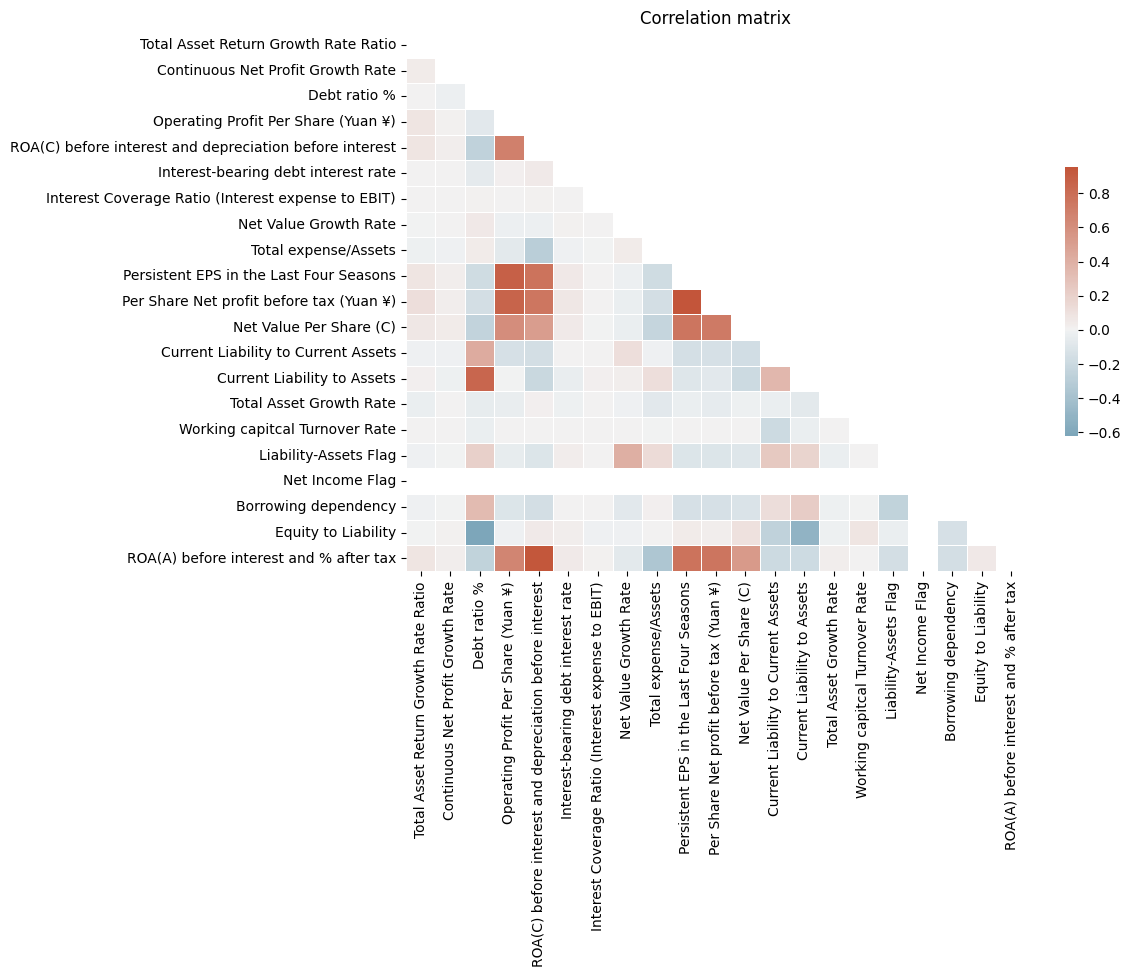

In [46]:
# Correlation

# Compute the correlation matrix
corr = company_df[selected_features_final].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation matrix")
plt.show()

> **Observations :** Strong correlation is found b/w feature, but this is expected. We can see a pattern Ratio's with *Per Share* or *Liabilities* as denominator. Lets retain the features, will take a decision after data analysis step

## Outliers and quartile distribution study 📊

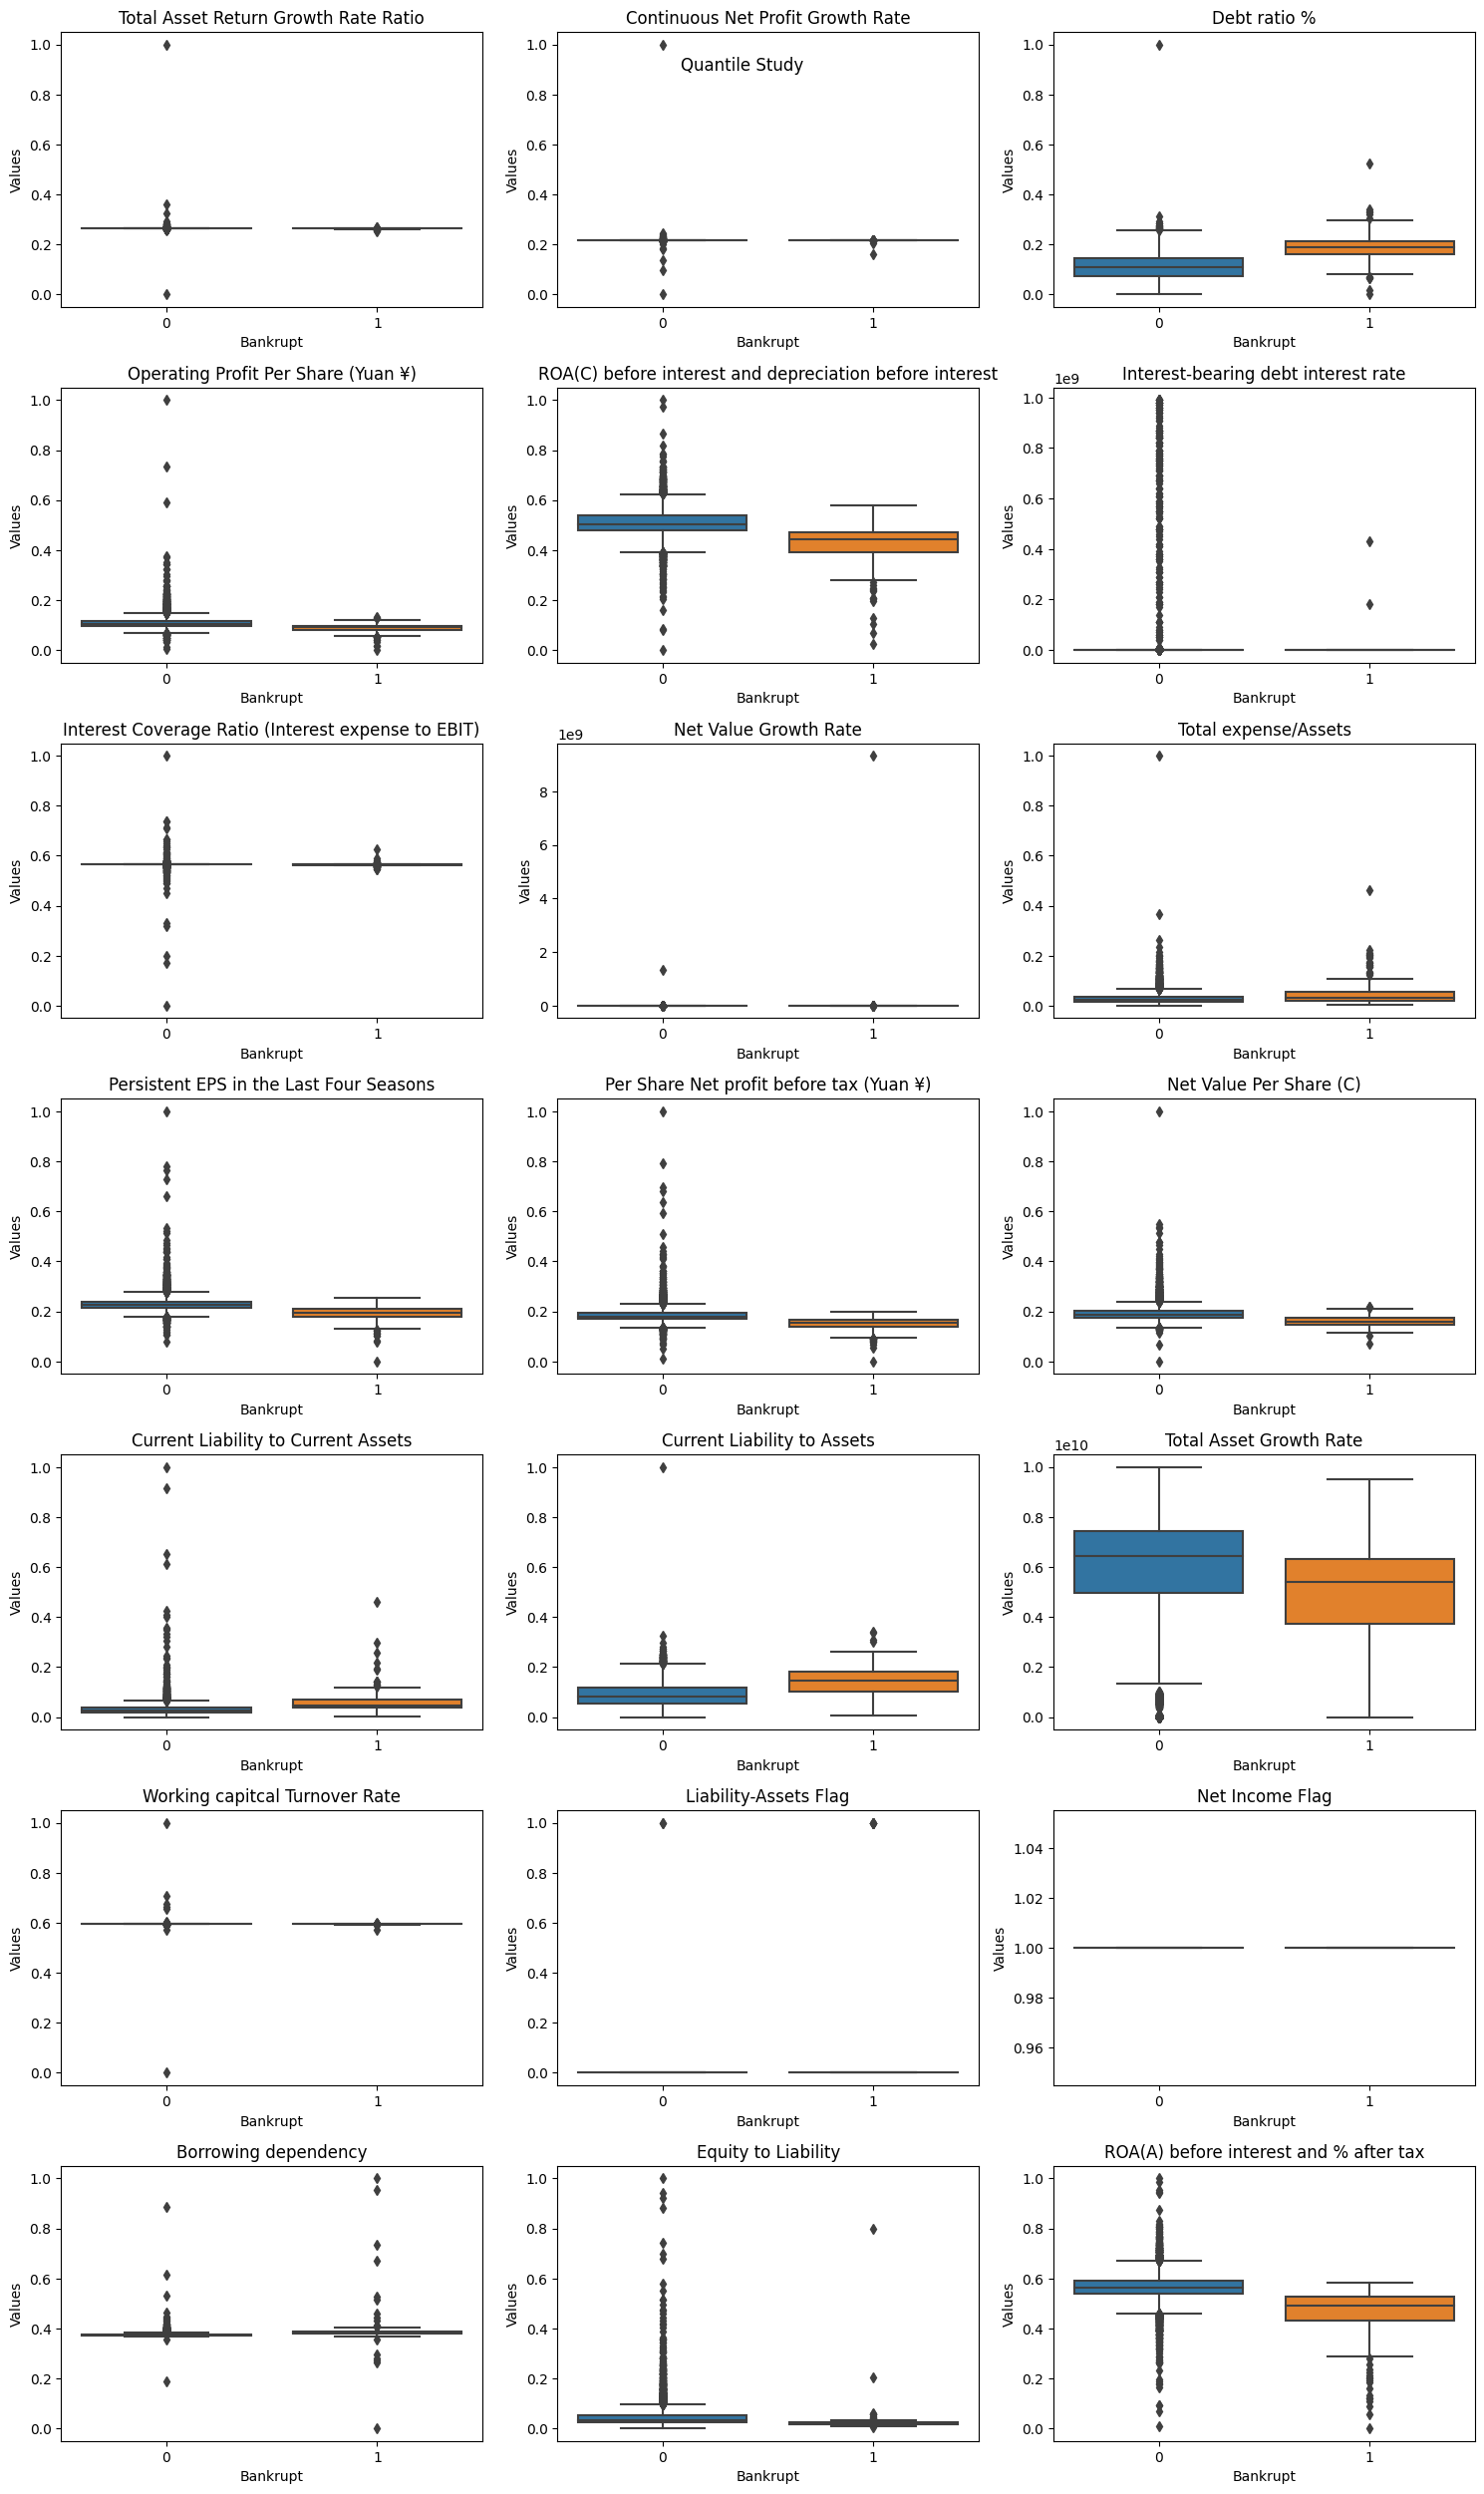

In [50]:
features_to_plot = selected_features_final.copy()
features_to_plot

# Create a new figure
fig = plt.figure(figsize=(15, 25))

# Iterate through each column in the given list
for i, col in enumerate(features_to_plot, start=1):
    plt.subplot(7,3, i)
    
    # Plot the boxplot for the current column using Seaborn
    sns.boxplot(data = company_df ,y=col, x= "Bankrupt" ,orient='v')
    
    # Set labels and title
    plt.title(col)
    plt.ylabel('Values')
    plt.xlabel('Bankrupt')

plt.tight_layout()
fig.subplots_adjust(top=0.99)
fig.suptitle("Quantile Study")
plt.show()

> **Observations :** 


We can notice that there are outliers (i.e Beyond Upper Whisker and Lower Whisker), will try to remove outliers post data analysis step

## Interaction between features

In [51]:
# Define categories of features
# categories = {
#     'Profitability': ['ROA(A) before interest and % after tax', 
#                       'Per Share Net profit before tax (Yuan ¥)',
#                       'Profit_margin', 
#                       'ROE', 
#                       'ROA_ratio'],
#     'Financial Stability': ['Interest Coverage Ratio (Interest expense to EBIT)', 
#                             'Borrowing dependency',
#                             'Debt ratio %', 
#                             'Debt_to_equity_ratio', 
#                             'Interest_coverage_ratio'],
#     'Asset Management': ['Net Value Per Share (C)', 
#                          'Equity to Liability', 
#                          'Current Liability to Assets',
#                          'Working capitcal Turnover Rate', 
#                          'Total Asset Growth Rate',
#                          'Total Asset Return Growth Rate Ratio', 
#                          'ROA(C) before interest and depreciation before interest',
#                          'Working_cap_turnover', 
#                          'Asset_turnover', 
#                          'Current_ratio', 
#                          'Total_asset_turnover']
# }

In [ ]:
# # Create pairplot based on categories
# features_to_plot1 = categories['Profitability'].copy()
# features_to_plot1.append("Bankrupt")
# pair_plt1 = sns.pairplot(data = company_df[features_to_plot1], kind='scatter', plot_kws={"alpha": 0.8},hue = "Bankrupt", markers="o")

# # Reduce x and y label font size
# for ax in pair_plt1.axes.flatten():
#     ax.set_xlabel(ax.get_xlabel(), fontsize=8)
#     ax.set_ylabel(ax.get_ylabel(), fontsize=8)
#     ax.tick_params(axis='x', which='both', labelsize=8)
#     ax.tick_params(axis='y', which='both', labelsize=8)

# # Show the plot
# pair_plt1.fig.suptitle("Profitability features", y=1.01)
# plt.show()

In [ ]:
# # Create pairplot based on categories
# features_to_plot2 = categories['Financial Stability'].copy()
# features_to_plot2.append("Bankrupt")
# pair_plt2 = sns.pairplot(data = company_df[features_to_plot2], kind='scatter',hue = "Bankrupt", markers="o", plot_kws={"alpha": 0.8})

# # Reduce x and y label font size
# for ax in pair_plt2.axes.flatten():
#     ax.set_xlabel(ax.get_xlabel(), fontsize=8)
#     ax.set_ylabel(ax.get_ylabel(), fontsize=8)
#     ax.tick_params(axis='x', which='both', labelsize=8)
#     ax.tick_params(axis='y', which='both', labelsize=8)

# # Show the plot
# pair_plt2.fig.suptitle("Financial Stability features", y=1.01)
# plt.show()

In [ ]:
# # Create pairplot based on categories
# features_to_plot3 = categories['Asset Management'].copy()
# features_to_plot3.append("Bankrupt")
# pair_plt3 = sns.pairplot(data = company_df[features_to_plot3], kind='scatter',hue = "Bankrupt", markers="o", height=2.5, plot_kws={"alpha": 0.8})

# # Reduce x and y label font size
# for ax in pair_plt3.axes.flatten():
#     ax.set_xlabel(ax.get_xlabel(), fontsize=8)
#     ax.set_ylabel(ax.get_ylabel(), fontsize=8)
#     ax.tick_params(axis='x', which='both', labelsize=8)
#     ax.tick_params(axis='y', which='both', labelsize=8)

# # Show the plot
# pair_plt3.fig.suptitle("Asset Management features", y=1.01)
# plt.show()

> **Observations** :
> * Bankrupted companies are clearly seperable using features but we do notice that there are outliers.
> * We do notice that there are less number of Bankrupt companies, so lets perform Target variable analysis

In [ ]:
# sns.kdeplot(
#     data=company_df, x='Borrowing dependency', y='Debt ratio %', hue="Bankrupt", fill=True,
# )

## Target variable analysis 🎯

In [52]:
# Converting Bankrupt column to Categorical
company_df['Bankrupt'] = company_df['Bankrupt'].astype(str)

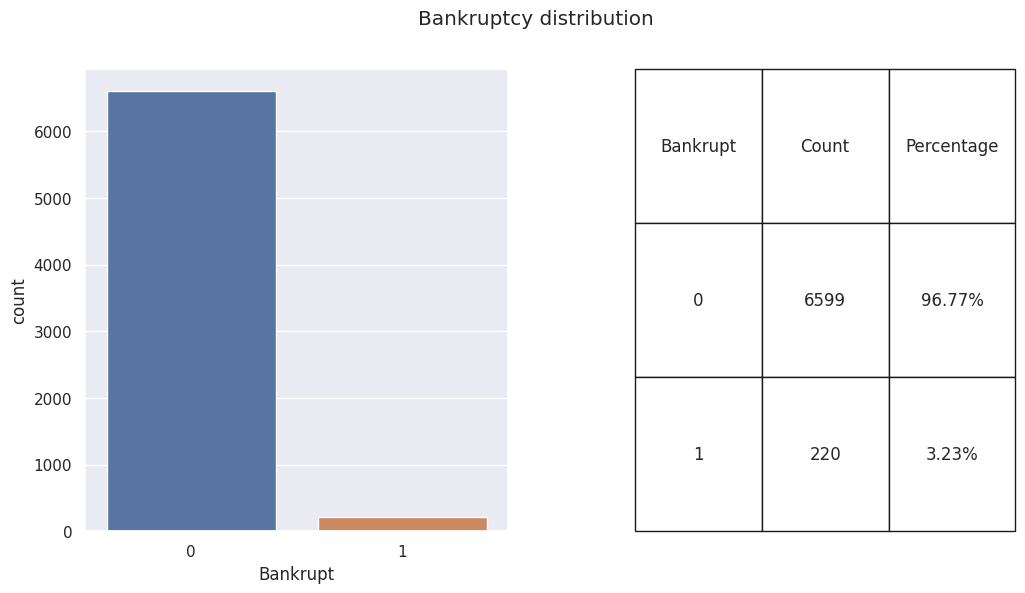

In [53]:
# Calculate counts and percentages
count_df = company_df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(company_df)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=company_df, order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution')
plt.show()

# Data imbalance problem ⚖️

In the above plot, we can notice that **Bankrupt companies contributes to 3.23% of the entire dataset**. In further train test split, we will end up with very minimal samples in "1" class in train set.

In real world usecases, its very normal to encounter a imbalanced dataset.But why data imbalance is such a such a huge problem ?

Imbalanced datasets pose challenges such as,
* Bias towards the majority class
* Poor generalization
* Inflated accuracy
* Difficulty in capturing rare events
* Insufficient learning from the minority class
* Biased feature importance

We can solve this problem by Oversampling/Undersampling the existing records using various algorithms such as **SMOTE, ADASYN, Tomek Links, Edited Nearest Neighbors, SMOTEENN, SMOTETomek** etc.,
<center><img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*P93SeDGPGw0MhwvCcvVcXA.png" width="1000" height="1000"/></center>

> **We will apply oversampling/undersampling techniques only on train samples to avoid any syntetic instances while evaluating the models**

Decision flow : 
* Split the data into train and test set
* Set sampling ration between 0 to 1 at 0.1 step, for each iteration perform the following :
    * Select multiple sampling algorithm's - Random Oversampler, SMOTE, ADASYN, SMOTEENN, SMOTETomek
    * Fit and oversample the train data with all the above algorithms
    * Fit a non linear model - Decision tree and validate the performance on test data
* Choose the algorithm with overall better metrics

## Choice of over samplers and hybrid samplers 🪙

### RANDOM OVERSAMPLER

Object to over-sample the minority class(es) by picking samples at random with replacement. No synthetic samples are generated from this algorithm.

### SMOTE 

It generates synthetic minority instances by interpolating between existing minority samples, thus improving model performance and reducing misclassification of the minority class.

**Issue : Outlier points in minority samples might boost the unrealistic synthetic samples which is not representative of the original sample.**

### BORDERLINE SMOTE

* This algorithm starts by classifying the minority class observations.
* It classifies any minority observation as a noise point if all the neighbors are the majority class, and such an observation is ignored while creating synthetic data (Similar to DBSCAN).
* Further, it classifies a few points as border points that have both majority and minority class as neighborhood and resample completely from these points (Extreme observations on which a support vector will typically pay attention to).

**Issue: End up giving more attention to these extreme observations.**

### ADASYN

* ADASYN is a generic framework that assesses the impurity of each minority observation's neighborhood.
* It computes the impurity by considering the ratio of majority observations to the total observations within the neighborhood, denoted by 'k'.
* The impurity ratio is then transformed into a probability distribution, ensuring the sum equals 1.
* Higher impurity ratios result in generating more synthetic points for a particular observation.
* Consequently, observations with higher ratios receive a greater number of synthetic points

**Issues:**
* When minority examples are sparsely distributed, neighborhoods may contain only one minority instance. Increasing the neighborhood size can mitigate this issue.
* The adaptability of ADASYN may impact precision because it generates more data in neighborhoods with a substantial majority-class presence.

### SMOTE-ENN

SMOTE is performed to generate Synthetic samples and ENN is used to undersample noisy data points

ENN : The fundamental principle underlying ENN is to remove instances that are misclassified by their nearest neighbors, with the assumption that such instances are likely to be mislabeled or noisy.

**Issues:**
* May discard useful information if the majority class instances are not truly misclassified.
* Assumes that KNN is an accurate estimator of class membership.

### SMOTE-TomekLinks

SMOTE is performed to generate Synthetic samples and TomekLinks is used to undersample datapoints with links.

A Tomek’s link exists when two samples from different classes are closest neighbors to each other.

<center><img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_tomek_links_002.png" width="600" height="600"/></center>

**Issues:**

* Underfitting - Removing too many instances from the majority class can lead to underfitting.
* Loss of useful information - Tomek links remove instances without considering their importance.Useful information may be deleted, affecting the decision boundary between classes.
* Ambiguity at class boundaries - Tomek links identify ambiguous points near the class boundary. These points are removed from the majority class, but their removal might not always improve model performance.


References : 

* https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804

* https://indraneeldb1993ds.medium.com/how-to-handle-imbalanced-data-oversampling-techniques-a5671c6dfb60#:~:text=to%20Borderline%20SMOTE.-,Cons%3A,a%20substantial%20majority%2Dclass%20presence.

* https://imbalanced-learn.org/stable/under_sampling.html#tomek-links

In [56]:
# Separate features and target variable
X = company_df[selected_features_final].copy()
y = company_df['Bankrupt'].copy()

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,shuffle=True, stratify=y, random_state=40)

print("Target variable distribution in Train samples :")
pd.DataFrame(y_train.value_counts())

Target variable distribution in Train samples :


,Bankrupt
0,4619
1,154


## Oversampling - Train data 🔰

### Creating a baseline decision tree model 🌴
Baseline model will be used to compare the performance of the oversampling algorithms.

In [57]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(input_scaler_func(X_train), y_train)
y_pred = dt_classifier.predict(input_scaler_func(X_test))

print("Performance of Decision tree with the original data (Without Synthetic train samples)")
baseline_perf = pd.DataFrame.from_dict([perf_metrics(np.array(y_test.astype(int)),np.array(y_pred.astype(int)))])
baseline_perf

Performance of Decision tree with the original data (Without Synthetic train samples)


,accuracy,balanced_accuracy,precision,recall,f1_score
0,95.6,64.77,31.82,31.82,31.82


In [58]:
# Sampling ratio = Number of samples in minority class after resampling / Number of samples in majority class
sampling_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

perf_os_algo = pd.DataFrame(columns=['sampling_ratio', 'algorithm', 'accuracy', 'balanced_accuracy','precision','recall','f1_score'])

for ratio in sampling_ratios :
    
    # Creating Oversamplers
    RANDOMOS_obj = RandomOverSampler(sampling_strategy=ratio, random_state = 42)
    SMOTE_obj = SMOTE(sampling_strategy=ratio, random_state = 42)
    ADASYN_obj = ADASYN(sampling_strategy=ratio,random_state = 42)
    SMOTEENN_obj = SMOTEENN(sampling_strategy=ratio,random_state = 42)
    SMOTETomek_obj = SMOTETomek(sampling_strategy=ratio,random_state = 42)
    BORDERSMOTE_obj = BorderlineSMOTE(sampling_strategy=ratio,random_state = 42)
    
    # Oversampled train samples
    X_train_os1, y_train_os1 = oversample_data(RANDOMOS_obj,input_scaler_func(X_train),y_train)
    X_train_os2, y_train_os2 = oversample_data(SMOTE_obj,input_scaler_func(X_train),y_train)
    X_train_os3, y_train_os3 = oversample_data(ADASYN_obj,input_scaler_func(X_train),y_train)
    X_train_os4, y_train_os4 = oversample_data(SMOTEENN_obj,input_scaler_func(X_train),y_train)
    X_train_os5, y_train_os5 = oversample_data(SMOTETomek_obj,input_scaler_func(X_train),y_train)
    X_train_os6, y_train_os6 = oversample_data(BORDERSMOTE_obj,input_scaler_func(X_train),y_train)
    
    # Preparing train samples for testing the performance
    X_train_oversampled_list = [X_train_os1,X_train_os2,X_train_os3,X_train_os4,X_train_os5,X_train_os6]
    y_train_oversampled_list = [y_train_os1,y_train_os2,y_train_os3,y_train_os4,y_train_os5,y_train_os6]
    oversampling_algo_list = ["Random oversampling" ,"SMOTE", "ADASYN", "SMOTEENN","SMOTE Tomek","Borderline SMOTE"]
    
    for X_tr_set, y_tr_set, algo in zip(X_train_oversampled_list, y_train_oversampled_list,oversampling_algo_list):
        
        # Fitting decision tree classifer on SMOTED train data
        dt_classifier = DecisionTreeClassifier(random_state=42)
        dt_classifier.fit(X_tr_set, y_tr_set)
        
        # Predicting
        y_pred = dt_classifier.predict(input_scaler_func(X_test))
        
        # Saving performance metrics to a dataframe
        perf_of_algo = perf_metrics(np.array(y_test.astype(int)),np.array(y_pred.astype(int)))
        perf_of_algo['sampling_ratio'] = ratio
        perf_of_algo['algorithm'] = algo
        
        perf_os_algo = pd.concat([perf_os_algo, pd.DataFrame([perf_of_algo])], ignore_index=True)

## Analysing SMOTE results 🔍

In [59]:
print("Baseline model results : ")
display(baseline_perf)

Baseline model results : 


,accuracy,balanced_accuracy,precision,recall,f1_score
0,95.6,64.77,31.82,31.82,31.82


In [61]:
print("Top SMOTED model results by precision : ")
display(perf_os_algo[perf_os_algo.precision > 30].sort_values(by=['precision'], ascending=False))
print("Top SMOTED model results by recall : ")
display(perf_os_algo[perf_os_algo.recall > 50].sort_values(by=['recall'], ascending=False))
print("Top SMOTED model results by f1 score : ")
display(perf_os_algo[perf_os_algo.f1_score > 33].sort_values(by=['f1_score','recall','precision'], ascending=False))

Top SMOTED model results by precision : 


,sampling_ratio,algorithm,accuracy,balanced_accuracy,precision,recall,f1_score
54,1.0,Random oversampling,96.68,64.60,47.62,30.30,37.04
48,0.9,Random oversampling,96.29,59.27,36.11,19.70,25.49
24,0.5,Random oversampling,95.60,66.24,32.86,34.85,33.82
1,0.1,SMOTE,94.92,71.74,31.00,46.97,37.35


Top SMOTED model results by recall : 


,sampling_ratio,algorithm,accuracy,balanced_accuracy,precision,recall,f1_score
51,0.9,SMOTEENN,91.10,82.22,22.64,72.73,34.53
27,0.5,SMOTEENN,91.30,79.39,22.00,66.67,33.08
33,0.6,SMOTEENN,91.50,79.49,22.45,66.67,33.59
39,0.7,SMOTEENN,90.42,77.47,19.63,63.64,30.00
57,1.0,SMOTEENN,90.13,77.32,19.09,63.64,29.37
15,0.3,SMOTEENN,92.52,77.83,24.26,62.12,34.89
45,0.8,SMOTEENN,90.66,76.87,19.81,62.12,30.04
21,0.4,SMOTEENN,90.81,74.02,18.88,56.06,28.24
9,0.2,SMOTEENN,92.86,74.34,23.68,54.55,33.03
25,0.5,SMOTE,93.26,73.81,24.65,53.03,33.65


Top SMOTED model results by f1 score : 


,sampling_ratio,algorithm,accuracy,balanced_accuracy,precision,recall,f1_score
1,0.1,SMOTE,94.92,71.74,31.00,46.97,37.35
54,1.0,Random oversampling,96.68,64.60,47.62,30.30,37.04
15,0.3,SMOTEENN,92.52,77.83,24.26,62.12,34.89
3,0.1,SMOTEENN,94.33,71.44,27.68,46.97,34.83
4,0.1,SMOTE Tomek,94.82,69.49,29.17,42.42,34.57
51,0.9,SMOTEENN,91.10,82.22,22.64,72.73,34.53
11,0.2,Borderline SMOTE,94.43,70.76,27.78,45.45,34.48
29,0.5,Borderline SMOTE,93.79,72.63,25.98,50.00,34.20
24,0.5,Random oversampling,95.60,66.24,32.86,34.85,33.82
25,0.5,SMOTE,93.26,73.81,24.65,53.03,33.65


> **Observations :** 
> * Models trained with oversampled (OS) obervations, comfortably beats baseline model at Recall, Precision and F1 score metrics
> * SMOTE ENN is the best interms of recall

SMOTE ENN - Train data with 0.1 sampling ratio will be used to build the models - Due to F1 score metric.

## Get SMOTE ENN - X Train and y Train

In [62]:
SMOTEENN_obj = SMOTEENN(sampling_strategy=0.3,random_state = 42)
X_train_os, y_train_os = oversample_data(SMOTEENN_obj,input_scaler_func(X_train),y_train)

# Oversampled train dataframe
train_os_df = pd.DataFrame(X_train_os,columns = X_train.columns)
train_os_df['Bankrupt'] = y_train_os

del(X_train_os,y_train_os)

# Data analysis - II 🪄

In this section, main focus will be on analysing the **Train data after SMOTEENN**

## Target variable analysis 🎯

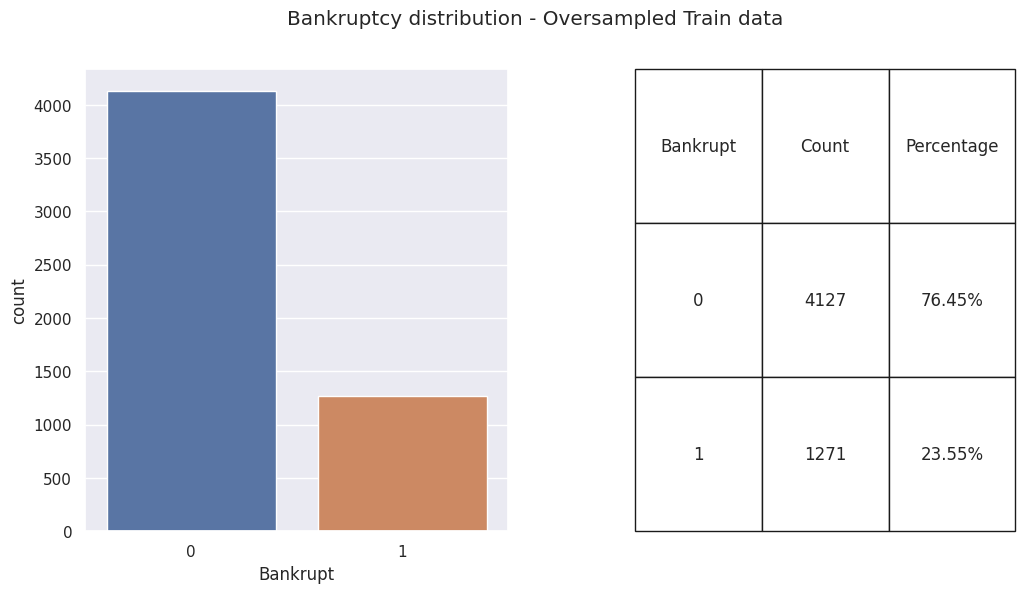

In [63]:
# Calculate counts and percentages
count_df = train_os_df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(train_os_df)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=train_os_df, order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution - Oversampled Train data')
plt.show()

## Predictive Power Score - PPS ⚡

The PPS is an **asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns**. 

The score ranges from **0 (no predictive power) to 1 (perfect predictive power)**. It can be used as an alternative to the correlation (matrix).

<center><img src="https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F39c8c85f-c973-42c0-a76e-34a8853192da_2526x2602.jpeg" width="400" height="400"/></center>


**Working :**

* Take one feature "X", and target variable - Build a Cross validated decision tree
* Take a baseline performance 
     - In Regression, as a baseline model will always predict median to calculate baseline MAE
     - In classification, as a baseline model will always predict majority class to calculate baseline F1
* Calculate the performance of CV - DT model and calculate PPS
     - Regression - PPS = 1 - (MAE_model / MAE_naive)
     - Classification - PPS = (F1_model - F1_naive) / (1 - F1_naive)
     
**Objective :**

* To understand the Prediction power of each feature
* We have created multiple redundant features, lets check the possibility to eliminate features based on PPS.

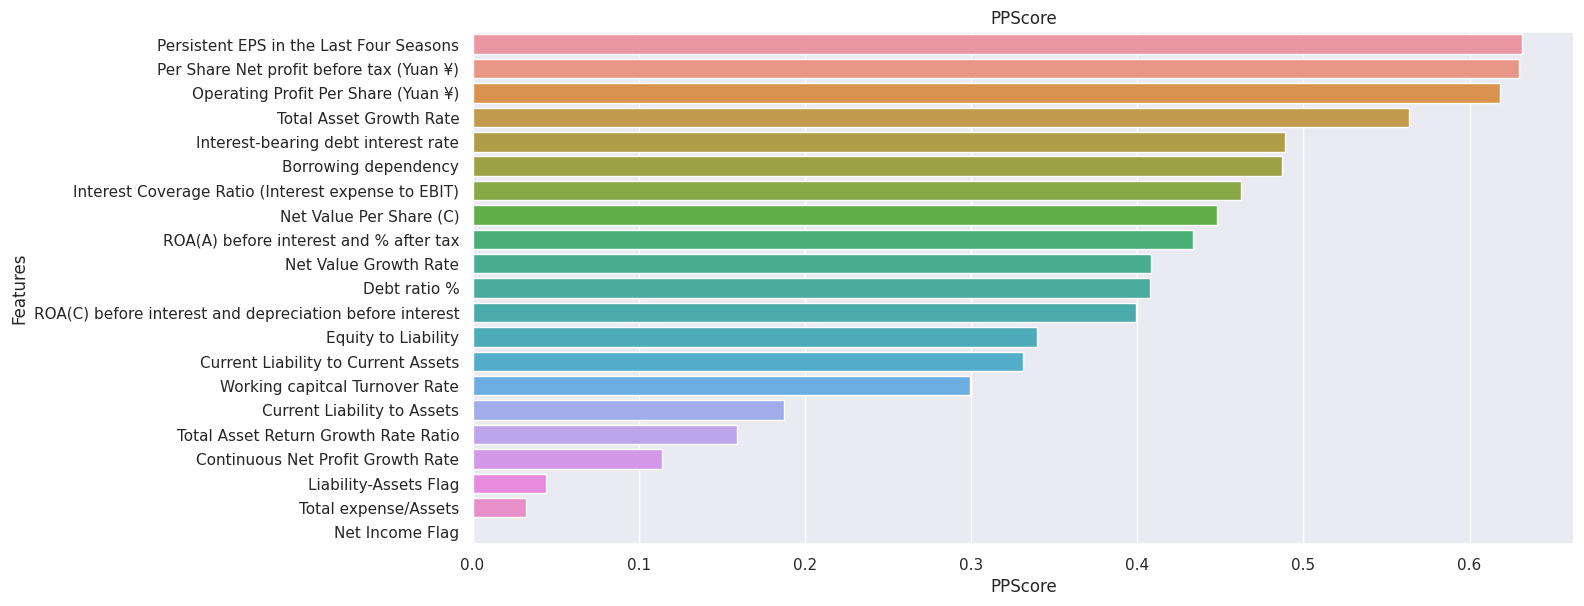

In [64]:
# Calculating Predictive power score (PPS)
pps_df = pps.predictors(train_os_df, y="Bankrupt")

# Plotting PPS
plt.figure(figsize=(16,6))
sns.barplot(data=pps_df, x="ppscore", y="x")
plt.ylabel("Features")
plt.xlabel("PPScore")
plt.tight_layout()
plt.title("PPScore")
plt.show()

> **Observations :** There are 10 features with 0 PPS, we can eliminate those features to build a parisimonious model.

In [65]:
# Get top features with PPS > 0
top_features_pps = pps_df[pps_df.ppscore > 0].x.tolist()

## Visualizing features with top 3 PPS📊

In [66]:
# Visualizing top 3 features based on PPS
fig = px.scatter_3d(train_os_df, x=top_features_pps[0], y=top_features_pps[1], z=top_features_pps[2],
              color='Bankrupt', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Outliers and quartile distribution study 📊

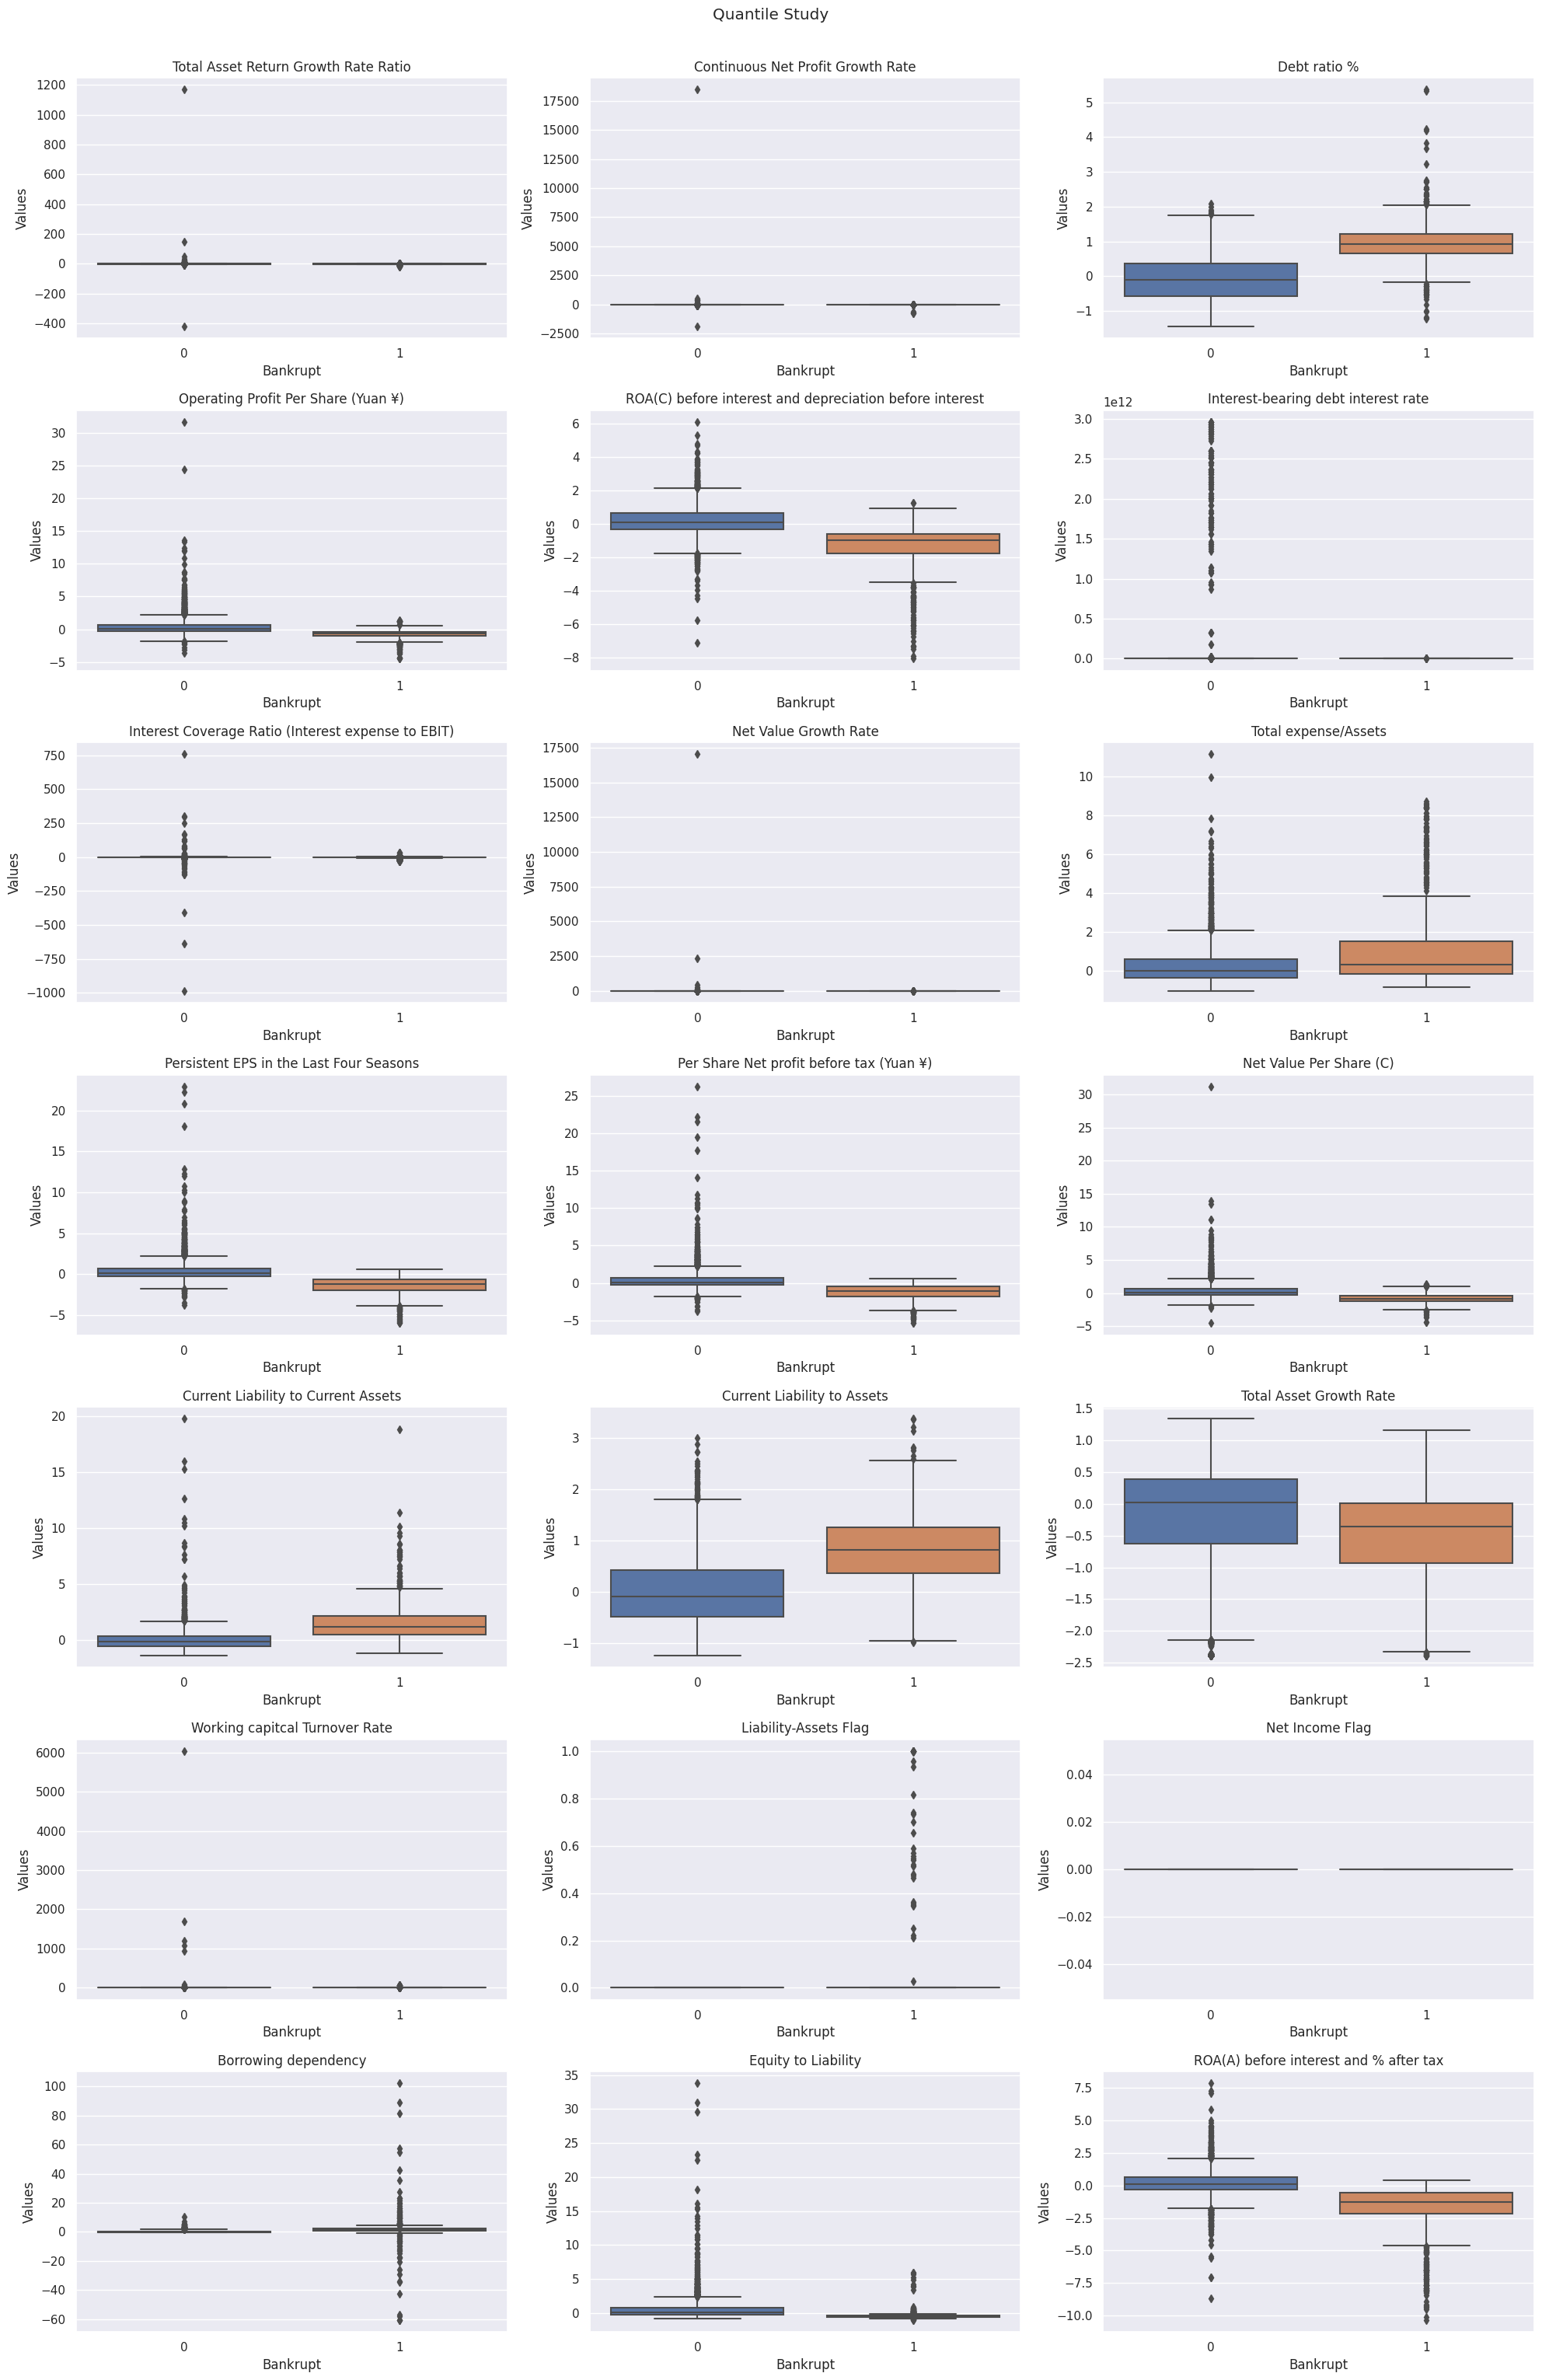

In [67]:
# Create a new figure
fig = plt.figure(figsize=(20, 30))

# Iterate through each column in the given list
for i, col in enumerate(selected_features_final, start=1):
    plt.subplot(7,3, i)
    
    # Plot the boxplot for the current column using Seaborn
    sns.boxplot(data = train_os_df ,y=col, x= "Bankrupt" ,orient='v')
    
    # Set labels and title
    plt.title(col)
    plt.ylabel('Values')
    plt.xlabel('Bankrupt')

plt.tight_layout()
fig.subplots_adjust(top=0.99)
fig.suptitle("Quantile Study",y = 1.02)
plt.show()

> **Observations :** We can notice a clear IQR difference b/w Bankrupt and Non Bankrupt companies in features like Per share net profit, Borrowing dependency, Equity to liability ratio, etc.

## Outlier detection

In [140]:
contamination_list = [0.025, 0.05,0.075,0.1]

# Creating outlier objects
od_obj1 = ECOD(contamination = 0.1)
od_obj2 = ABOD(contamination = 0.1)
od_obj3 = KNN(contamination = 0.1)

od_obj_final = od_obj3

od_obj_final.fit(train_os_df[selected_features_final])
outliers_1 = od_obj_final.predict(train_os_df[selected_features_final])

# Create a DataFrame using the lists
outlier_bankruptcy_df = pd.DataFrame({'Outliers': outliers_1, 'Bankrupt': train_os_df.Bankrupt})

# Create the cross-tabulation
cross_tab = pd.crosstab(outlier_bankruptcy_df['Outliers'], outlier_bankruptcy_df['Bankrupt'])

# Print the cross-tabulation
print(cross_tab)

Bankrupt     0     1
Outliers            
0         3691  1199
1          436    72


# Oversampling test data 🧪

Before building our different types of ML models, lets take a quick look at test data's target value distribution.

Because of data imbalance in the overall dataset, it is good to ensure enough number of samples to validate our model. In such cases, we will apply oversampling algorithm to test data.

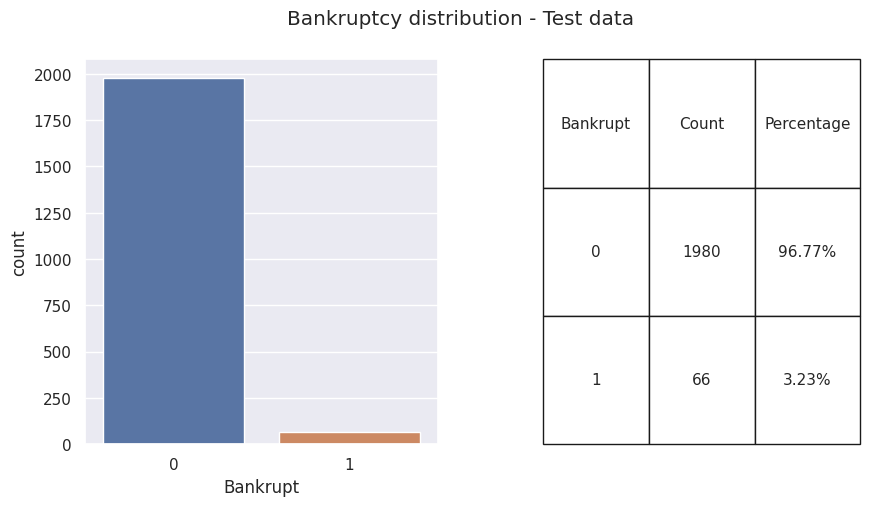

In [68]:
# Calculate counts and percentages
count_df = y_test.value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(y_test)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=pd.DataFrame(y_test), order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution - Test data')
plt.show()

We will apply same oversampling algorithm and parameters to generate more test samples. Same algorithm and parameters are used as train data, assuming train and test samples are representative.

In [69]:
SMOTEENN_obj = SMOTEENN(sampling_strategy=0.3,random_state = 42)
X_test_os, y_test_os = oversample_data(SMOTEENN_obj,input_scaler_func(X_test),y_test)

# Oversampled train dataframe
test_os_df = pd.DataFrame(X_test_os,columns = X_test.columns)
test_os_df['Bankrupt'] = y_test_os

del(X_test_os,y_test_os)

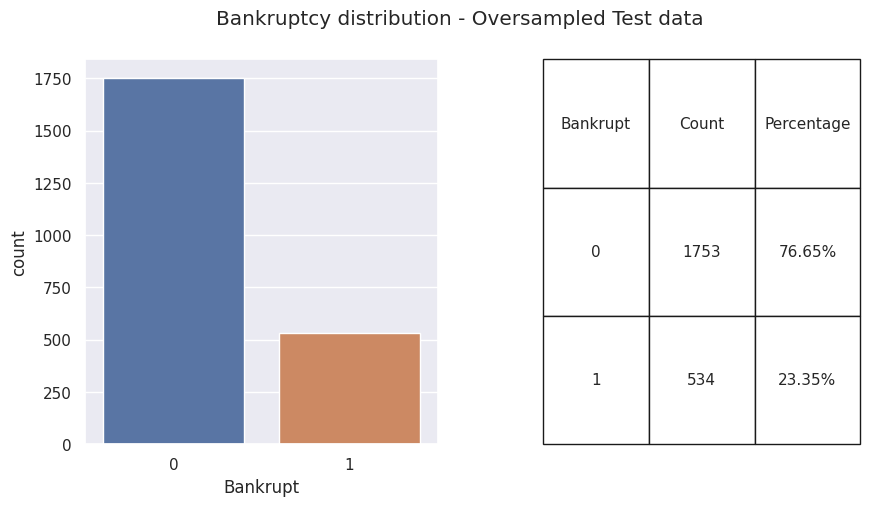

In [70]:
# Calculate counts and percentages
count_df = test_os_df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(test_os_df)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=test_os_df, order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution - Oversampled Test data')
plt.show()

# Building a model 🤖

In [71]:
X_train_os = train_os_df[selected_features_final]
y_train_os = train_os_df.Bankrupt.astype(int)

In [72]:
X_test_final = pd.DataFrame(input_scaler_func(test_os_df[selected_features_final]),columns=selected_features_final)
y_test_final = test_os_df.Bankrupt.astype(int)

In [ ]:
# Define the XGBoost classifier
xgb = XGBClassifier(random_state = 42)

# Define hyperparameters to search
params = {
    'n_estimators': [50,100,150,200],
    'max_depth': [3, 4, 5],
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 2, 3, 4]
}

# Perform random search
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=50, scoring='f1', cv=5, verbose=10, random_state=42)
random_search.fit(X_train_os, y_train_os)

In [74]:
# # # Define the DT classifier
# dt = DecisionTreeClassifier(random_state = 42)

# # # Define hyperparameters to search
# params = {
#     "max_depth": [3, 4,5,6,7,8],
#     "max_features": randint(1, 11),
#     "min_samples_split": randint(2, 11),
#     "min_samples_leaf": randint(1, 11),
#     "criterion": ["gini", "entropy"]
# }

# # # Perform random search
# random_search = RandomizedSearchCV(estimator=dt, param_distributions=params, scoring='f1',n_iter=100, cv=5, verbose=1, random_state=42)
# random_search.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x78415bf1ba30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x78415c990610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x78415c990400>},
                   random_state=42, scoring='f1', verbose=1)

In [75]:
# # # Define the RF classifier
# rf = RandomForestClassifier(random_state = 42)

# # # Define hyperparameters to search
# params = {
#     'n_estimators': randint(10, 200),
#     'max_depth': [None] + list(randint(3, 20).rvs(10)),
#     'max_features': randint(1, 11),
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 11),
#     'bootstrap': [True, False]
# }

# # # Perform random search
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, scoring='f1',n_iter=100, cv=5, verbose=1, random_state=42)
# random_search.fit(X_train_os, y_train_os)

In [99]:
# Print the best parameters found
print("Best score: ", round(random_search.best_score_,2))

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Get the best model
ml_model = random_search.best_estimator_

Best score:  0.96
Best parameters found:  {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1577777777777778, 'gamma': 0, 'colsample_bytree': 0.6}


## Probability threshold analysis

In [100]:
# Predicting probabilities for each train sample
y_train_pred_prob = ml_model.predict_proba(X_train_os)

# Saving prediction in a dataframe 
y_train_pred_prob = pd.DataFrame(y_train_pred_prob,columns=["0","1"])

# Providing threshold as 0.5
y_train_pred_prob["Prediction"] = y_train_pred_prob["1"] > 0.5
y_train_pred_prob["Prediction"] = y_train_pred_prob["Prediction"].astype(int)
y_train_pred_prob["True_Class"] = y_train_os
y_train_pred_prob

,0,1,Prediction,True_Class
0,0.997804,0.002196,0,0
1,0.999390,0.000610,0,0
2,0.999912,0.000088,0,0
3,0.999896,0.000104,0,0
4,0.999880,0.000120,0,0
...,...,...,...,...
5393,0.003311,0.996689,1,1
5394,0.002145,0.997855,1,1
5395,0.007889,0.992111,1,1
5396,0.002387,0.997613,1,1


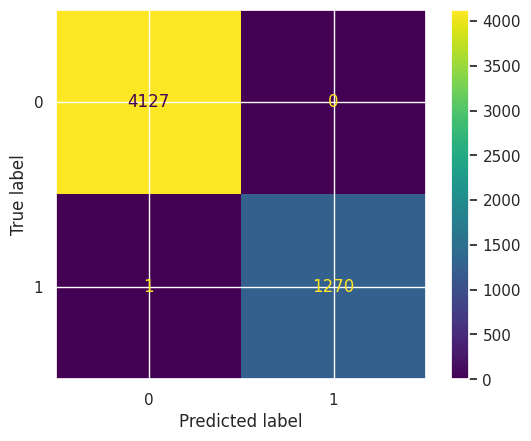

In [101]:
cm = confusion_matrix(y_train_pred_prob.True_Class, y_train_pred_prob.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

/tmp/ipykernel_34/196210570.py:1: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



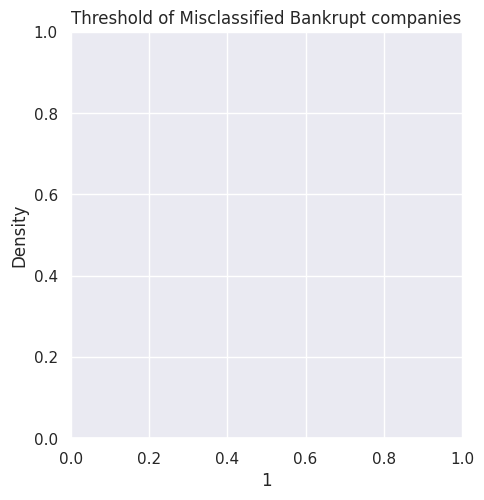

In [102]:
sns.displot(data=y_train_pred_prob[(y_train_pred_prob.Prediction == 0) & (y_train_pred_prob.True_Class == 1)], x="1", kind="kde")
plt.title("Threshold of Misclassified Bankrupt companies")
plt.show()

In [103]:
# Providing threshold as 0.5
y_train_pred_prob["Prediction"] = y_train_pred_prob["1"] > 0.5
y_train_pred_prob["Prediction"] = y_train_pred_prob["Prediction"].astype(int)
y_train_pred_prob["True_Class"] = y_train_os
y_train_pred_prob

,0,1,Prediction,True_Class
0,0.997804,0.002196,0,0
1,0.999390,0.000610,0,0
2,0.999912,0.000088,0,0
3,0.999896,0.000104,0,0
4,0.999880,0.000120,0,0
...,...,...,...,...
5393,0.003311,0.996689,1,1
5394,0.002145,0.997855,1,1
5395,0.007889,0.992111,1,1
5396,0.002387,0.997613,1,1


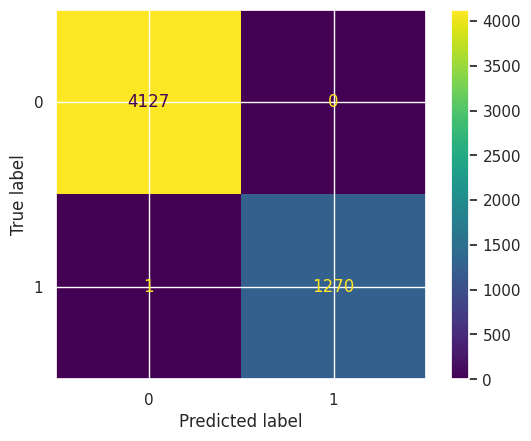

In [104]:
cm = confusion_matrix(y_train_pred_prob.True_Class, y_train_pred_prob.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Prediction on test data

In [105]:
# Predict
y_pred = ml_model.predict_proba(X_test_final)
# y_pred = ml_model.predict_proba(pd.DataFrame(input_scaler_func(X_test[selected_features_final]),columns = selected_features_final))

# Saving prediction in a dataframe 
y_test_pred_prob = pd.DataFrame(y_pred,columns=["0","1"])

# Providing threshold as 0.5
y_test_pred_prob["Prediction"] = y_test_pred_prob["1"] > 0.3
y_test_pred_prob["Prediction"] = y_test_pred_prob["Prediction"].astype(int)
y_test_pred_prob["True_Class"] = y_test_final
y_test_pred_prob

,0,1,Prediction,True_Class
0,0.999901,0.000099,0,0
1,0.999557,0.000443,0,0
2,0.999831,0.000169,0,0
3,0.993222,0.006778,0,0
4,0.999874,0.000126,0,0
...,...,...,...,...
2282,0.003717,0.996283,1,1
2283,0.708543,0.291457,0,1
2284,0.959139,0.040861,0,1
2285,0.010723,0.989277,1,1


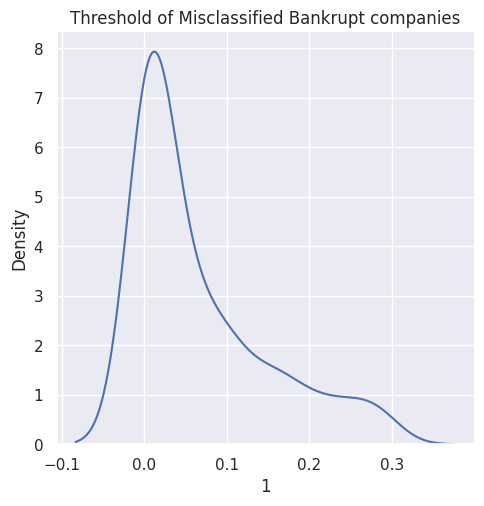

In [106]:
sns.displot(data=y_test_pred_prob[(y_test_pred_prob.Prediction == 0) & (y_test_pred_prob.True_Class == 1)], x="1", kind="kde")
plt.title("Threshold of Misclassified Bankrupt companies")
plt.show()

In [107]:
print(classification_report(y_true = y_test_pred_prob.True_Class, y_pred = y_test_pred_prob.Prediction))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1753
           1       0.93      0.61      0.74       534

    accuracy                           0.90      2287
   macro avg       0.91      0.80      0.84      2287
weighted avg       0.90      0.90      0.89      2287



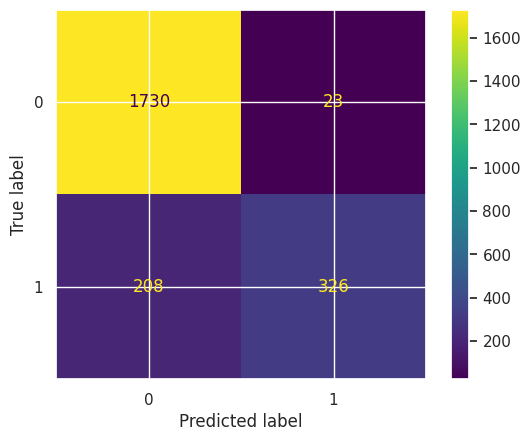

In [108]:
cm = confusion_matrix(y_test_pred_prob.True_Class, y_test_pred_prob.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [109]:
# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': ml_model.feature_names_in_, 'Importance': ml_model.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
18,Borrowing dependency,0.217658
9,Persistent EPS in the Last Four Seasons,0.144314
7,Net Value Growth Rate,0.113043
2,Debt ratio %,0.106943
6,Interest Coverage Ratio (Interest expense to E...,0.062700
4,ROA(C) before interest and depreciation before...,0.053371
10,Per Share Net profit before tax (Yuan ¥),0.050647
5,Interest-bearing debt interest rate,0.044564
12,Current Liability to Current Assets,0.026719
20,ROA(A) before interest and % after tax,0.022572


# Model Interpretation